In [14]:
class Value : 
    def __init__(self, data, _children = (), _op = ""): 
        self.data = data
        self._prev = set(_children)
        self._op= _op
    def __repr__(self): 
        return f'Value of the  object : "{self.data}"'
    def __add__(self, other): 
        return Value(self.data + other.data, (self, other), _op = '+')
    def __mul__(self, other): 
        return Value(self.data * other.data, (self, other), _op = '*')
a= Value(2.0)
b= Value(-3.0)
c= Value(10)
out = a* b +c
out

Value of the  object : "4.0"

In [15]:
out._prev, out._op

({Value of the  object : "-6.0", Value of the  object : "10"}, '+')

# [Perceptron::Forward Pass] Numpy implementation

In [10]:
import numpy as np
class Perceptron : 
    def __init__(self, x, w, b, activation): 
        self.x= x
        self.w= w
        self.b = b 
        self.activation = activation 

    def activation_layer(self, x): 
        if self.activation=='sigmoid': 
            return (1/(1+np.exp(-x)))
    def out_layer(self): 
        out = np.dot(self.w, self.x)+ self.b
        return self.activation_layer(out)

x= np.array([0.3, 0.5, 0.2])
w= np.array([0.2, 0.3, 0.3])
b= 0.1 
mlp = Perceptron(x, w, b, "sigmoid")
print(f"Perceptron output {mlp.out_layer()}")

Perceptron output 0.5914589784327801


# [Perceptron::Forward Pass] Pytorch implementation

In [14]:
import torch
class Perceptron : 
    def __init__(self, x, w, b, activation): 
        self.x= x
        self.w= w
        self.b = b 
        self.activation = activation 

    def activation_layer(self, x): 
        if self.activation=='sigmoid': 
            return (1/(1+torch.exp(-x)))
    def out_layer(self): 
        out = torch.dot(self.w, self.x)+ self.b
        return self.activation_layer(out)

x= torch.tensor([0.3, 0.5, 0.2])
w= torch.tensor([0.2, 0.3, 0.3])
b= torch.tensor(0.1) 
mlp = Perceptron(x, w, b, "sigmoid")
print(f"Perceptron output {mlp.out_layer()}")

Perceptron output 0.5914589762687683


# [Multi-Layer Perceptron::Forward Pass] Numpy implementation

In [23]:
class MultiLayerPerceptron(): 
    def __init__(self, x, y): 
        self.x = x
        self.y= y

    def sigmoid(self, x): 
        return (1/(1+np.exp(-x)))
    def relu(self, x): 
        return np.maximum(0, x)
    def output(self, x, y): 
        w1= np.random.randn(3, 3)
        b1 = np.random.randn(1, 3)
        z1= np.dot(x, w1) + b1 # Layer 1 (1, 3)
        a1= self.relu(z1)   # activation at layer 1
        w2= np.random.rand(3, 1)
        b2= np.random.randn(1, 3)
        z2= np.dot(a1, w2) + b2 # Layer 2 (1, 3)
        a2= self.sigmoid(z2)   # activation at layer 2
        return a2


np.random.seed(0)
x= np.random.randn(1, 3)
y = np.random.randn(1)
mlp = MultiLayerPerceptron(x,y)
mlp.output(x, y)

array([[0.98874672, 0.99409157, 0.97995439]])

# [Multi-Layer Perceptron::Forward Pass] Pytorch implementation

In [42]:
import torch
import torch.nn.functional as F
class Perceptron : 
    def __init__(self, x): 
        self.x= x
    def forward_pass(self, x): 
        torch.manual_seed(0)
        w1= torch.randn([3, 4], requires_grad= True )
        b1= torch.randn([4], requires_grad= True)
        w2= torch.randn([4, 4], requires_grad= True )
        b2= torch.randn([1, 4], requires_grad= True)
        z1= torch.matmul(x, w1) + b1 
        a1= F.relu(z1)
        z2= a1@ w2 + b2 
        a2= F.sigmoid(z2)
        return a2
x= torch.tensor([[0.3, 0.5, 0.2]])
mlp = Perceptron(x)
print(f"Perceptron output {mlp.forward_pass(x)}")

Perceptron output tensor([[0.6650, 0.9532, 0.0961, 0.1328]], grad_fn=<SigmoidBackward0>)


# [Code] NumPy: Full Training Loop with Backprop


loss at epoch 0 = 1.3818735736922512)
loss at epoch 100 = 0.6952459232859833)
loss at epoch 200 = 0.6893374045178133)
loss at epoch 300 = 0.6874487225577659)
loss at epoch 400 = 0.6871377281101588)
loss at epoch 500 = 0.6861984525724985)
loss at epoch 600 = 0.685522624215662)
loss at epoch 700 = 0.6854051220509593)
loss at epoch 800 = 0.6853078006907443)
loss at epoch 900 = 0.6852045040299594)


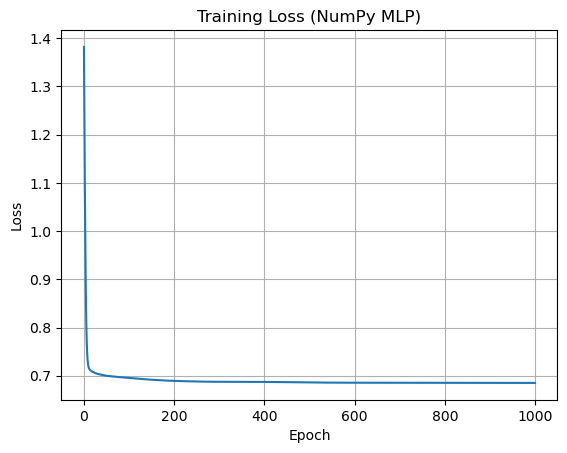

In [83]:
class MultiLayerPerceptron(): 
    def __init__(self, x, y, epoch, lr): 
        self.x = x
        self.y= y
        self.epoch = epoch
        self.lr = lr

    def sigmoid(self, x): 
        return (1/(1+np.exp(-x)))
    def relu(self, x): 
        return np.maximum(0, x)
    def BinaryCrossEntropy(self, y_pred, y_true): 
        eps=1e-8
        return -np.mean(y_true*np.log(y_pred+eps)+ (1-y_true)*np.log(1-y_pred+eps))
    def relu_derivative(self, x): 
        return (x>0).astype(float)
    def output(self, x, y): 
        losses= []
        # forwardprop
        # Params
        # input_size, hidden_size, output_size = 3, 3, 1
        # W1 = np.random.randn(input_size, hidden_size)      # (3, 4)
        # b1 = np.zeros((1, hidden_size))                    # (1, 4)
        # W2 = np.random.randn(hidden_size, output_size)     # (4, 1)
        # b2 = np.zeros((1, output_size))                    # (1, 1)
        w1= np.random.randn(3, 3)
        b1 = np.random.randn(1, 3)
        w2= np.random.rand(3, 1)
        b2= np.random.randn(1, 1)

        
        for i in range(self.epoch):  
            z1= np.dot(x, w1) + b1 # Layer 1 (1, 3)
            a1= self.relu(z1)   # activation at layer 1
    
            z2= np.dot(a1, w2) + b2 # Layer 2 (1, 3)
            a2= self.sigmoid(z2)   # activation at layer 2

            # loss 
            loss = self.BinaryCrossEntropy(a2, y)
            losses.append(loss)
            if i%100==0: 
                print(f"loss at epoch {i} = {loss})")
            
            #backwardprop 
            delta2 = a2-y 
            dw2= (a1.T@delta2)/a1.shape[0]
            db2= np.mean(delta2, axis= 0, keepdims= True)
    
            delta1= (delta2@w2.T)*self.relu_derivative(z1)
            dw1= (x.T@delta1)/x.shape[0]
            db1 = np.mean(delta1, axis= 0, keepdims= True)
    
            # update weigts 
            w2-=self.lr*dw2
            b2-=self.lr*db2
            w1-=self.lr*dw1
            b1-=self.lr*db1
        import matplotlib.pyplot as plt
        plt.plot(losses)
        plt.title("Training Loss (NumPy MLP)")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.show()

np.random.seed(42)
x= np.random.randn(100, 3)
y = np.random.rand(100, 1)
mlp = MultiLayerPerceptron(x,y, 1000, 0.1)
losses = mlp.output(x, y)

# [Code] PyTorch (no nn module)
